## Dataset Description

The **2015 Flight Delays and Cancellations** dataset contains detailed records of flight information for the year 2015. It includes data related to flight delays, cancellations, and their causes, along with information about the airlines and airports involved. 

**Dataset Link :** https://www.kaggle.com/datasets/usdot/flight-delays

This dataset consists of three CSV files:

**1. airlines.csv**

**IATA_CODE:** Airline Identifier

**AIRLINE:** Name of the airline

**2. airports.csv**

**IATA_CODE:** Airport Identifier

**AIRPORT:** Name of the airport

**CITY:** City of the airport

**STATE:** State of the airport

**COUNTRY:** Country of the airport

**LATITUDE:** Latitude of the airport

**LONGITUDE:** Longitude of the airport

**3. flights.csv**

**YEAR:** Year of the flight trip

**MONTH:** Month of the flight trip

**DAY:** Day of the month

**DAY_OF_WEEK:** Day of the week

**AIRLINE:** Airline Identifier

**FLIGHT_NUMBER:** Flight Identifier

**TAIL_NUMBER:** Aircraft Identifier

**ORIGIN_AIRPORT:** Starting airport code

**DESTINATION_AIRPORT:** Destination airport code

**SCHEDULED_DEPARTURE:** Scheduled departure time

**DEPARTURE_TIME:** Actual departure time

**DEPARTURE_DELAY:** Delay on departure

**TAXI_OUT:** Time between origin airport gate and wheels off

**WHEELS_OFF:** Time when the aircraft’s wheels leave the ground

**SCHEDULED_TIME:** Planned time for the flight trip

**ELAPSED_TIME:** Total flight time

**AIR_TIME:** Time between wheels off and wheels on

**DISTANCE:** Distance between origin and destination airports

**WHEELS_ON:** Time when the aircraft’s wheels touch the ground

**TAXI_IN:** Time from wheels on to gate arrival

**SCHEDULED_ARRIVAL:** Scheduled arrival time

**ARRIVAL_TIME:** Actual arrival time

**ARRIVAL_DELAY:** Delay on arrival

**DIVERTED:** Whether the flight was diverted (1 = diverted)

**CANCELLED:** Whether the flight was cancelled (1 = cancelled)

**CANCELLATION_REASON:** Reason for cancellation (A = Airline, B = Weather, C = National Air System, D = Security)

**AIR_SYSTEM_DELAY:** Delay caused by air system

**SECURITY_DELAY:** Delay caused by security

**AIRLINE_DELAY:** Delay caused by the airline

**LATE_AIRCRAFT_DELAY:** Delay caused by aircraft

**WEATHER_DELAY:** Delay caused by weather

## Data Loading and Initial Exploration 

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FlightDelay").getOrCreate()

In [0]:
# Loading the datasets
flights_df = spark.read.csv("dbfs:/FileStore/flights.csv", header=True, inferSchema=True)
airlines_df = spark.read.csv("dbfs:/FileStore/airlines.csv", header=True, inferSchema=True)
airports_df = spark.read.csv("dbfs:/FileStore/airports.csv", header=True, inferSchema=True)

In [0]:
# Rename the AIRLINE column in the airlines_df to avoid conflicts
airlines_df = airlines_df.withColumnRenamed("AIRLINE", "AIRLINE_NAME")

# Join flights with airlines
flights_airlines_df = flights_df.join(airlines_df, flights_df.AIRLINE == airlines_df.IATA_CODE, "left")

# Rename IATA_CODE in airports_df to avoid conflicts
airports_origin = airports_df.withColumnRenamed("IATA_CODE", "ORIGIN_AIRPORT_CODE")
airports_destination = airports_df.withColumnRenamed("IATA_CODE", "DESTINATION_AIRPORT_CODE")

# Join with origin airport details
flights_with_origin = flights_airlines_df.join(
    airports_origin, 
    flights_df.ORIGIN_AIRPORT == airports_origin.ORIGIN_AIRPORT_CODE, 
    "left"
)

# Join with destination airport details
flights_with_destination = flights_with_origin.join(
    airports_destination, 
    flights_df.DESTINATION_AIRPORT == airports_destination.DESTINATION_AIRPORT_CODE, 
    "left"
)

# The final dataframe with all the columns joined
df = flights_with_destination

In [0]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [0]:
# Drop redundant columns
df = df.drop("IATA_CODE", "AIRLINE", "ORIGIN_AIRPORT_CODE", "DESTINATION_AIRPORT_CODE", 
             "AIRPORT", "CITY", "STATE", "COUNTRY", "LATITUDE", "LONGITUDE")

**Q1.  What are the data types of each column?**

In [0]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (nullable = true)
 |-- DIVERTED: integer (nu

In [0]:
display(df.limit(10))

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME
2015,1,1,4,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,Alaska Airlines Inc.
2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,American Airlines Inc.
2015,1,1,4,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,US Airways Inc.
2015,1,1,4,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,American Airlines Inc.
2015,1,1,4,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,Alaska Airlines Inc.
2015,1,1,4,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null,Delta Air Lines Inc.
2015,1,1,4,612,N635NK,LAS,MSP,25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null,Spirit Air Lines
2015,1,1,4,2013,N584UW,LAX,CLT,30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null,US Airways Inc.
2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null,American Airlines Inc.
2015,1,1,4,1173,N826DN,LAS,ATL,30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,null,null,null,null,null,null,Delta Air Lines Inc.


**Q2. How many rows and columns does the dataset contain?**

In [0]:
# Count the number of rows
row_count = df.count()

# Count the number of columns
column_count = len(df.columns)

print(f"Number of rows: {row_count}")
print(f"Number of columns: {column_count}")

Number of rows: 5819079
Number of columns: 31


## Data Cleaning and Transformation 

**Q3. Which columns have missing values, and how can you handle them?**

In [0]:
from pyspark.sql.functions import col, count, when

# Counting nulls in each column
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Collect the result as a list
missing_values_list = missing_values.collect()[0].asDict()

# Print the missing values with the column name
print("Missing values per column:")
for column, missing_count in missing_values_list.items():
    print(f"{column}: {missing_count}")

Missing values per column:
YEAR: 0
MONTH: 0
DAY: 0
DAY_OF_WEEK: 0
FLIGHT_NUMBER: 0
TAIL_NUMBER: 14721
ORIGIN_AIRPORT: 0
DESTINATION_AIRPORT: 0
SCHEDULED_DEPARTURE: 0
DEPARTURE_TIME: 86153
DEPARTURE_DELAY: 86153
TAXI_OUT: 89047
WHEELS_OFF: 89047
SCHEDULED_TIME: 6
ELAPSED_TIME: 105071
AIR_TIME: 105071
DISTANCE: 0
WHEELS_ON: 92513
TAXI_IN: 92513
SCHEDULED_ARRIVAL: 0
ARRIVAL_TIME: 92513
ARRIVAL_DELAY: 105071
DIVERTED: 0
CANCELLED: 0
CANCELLATION_REASON: 5729195
AIR_SYSTEM_DELAY: 4755640
SECURITY_DELAY: 4755640
AIRLINE_DELAY: 4755640
LATE_AIRCRAFT_DELAY: 4755640
WEATHER_DELAY: 4755640
AIRLINE_NAME: 0


In [0]:
columns_to_drop = [
    'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'
]
df = df.drop(*columns_to_drop)

**Dropping columns with excessive missing values since these columns will not be useful for analysis**

In [0]:
df = df.dropna(subset=['TAIL_NUMBER'])

**Missing values in TAIL_NUMBER are dropped because this is a crucial identifier for aircraft, and rows without it might not be reliable**

In [0]:
df = df.fillna({
    'SCHEDULED_TIME': 0,
    'ELAPSED_TIME': 0,
    'WHEELS_OFF': 0,
    'WHEELS_ON': 0,
    'DEPARTURE_TIME': 0,
    'DEPARTURE_DELAY': 0,  
    'ARRIVAL_DELAY': 0,    
    'AIR_TIME': 0,         
    'TAXI_OUT': 0,        
    'TAXI_IN': 0,          
    'ARRIVAL_TIME': 0,     
})

**These columns have a significant number of missing values. We can fill them with 0, as missing values here could imply no recorded data (perhaps due to flight cancellations or scheduling issues)**

In [0]:
# Counting nulls in each column
updated_missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Collect the result as a list
updated_missing_values_list = updated_missing_values.collect()[0].asDict()

# Print the missing values in a schema-like format
print("Missing values per column:")
for column, updated_missing_count in updated_missing_values_list.items():
    print(f"{column}: {updated_missing_count}")

Missing values per column:
YEAR: 0
MONTH: 0
DAY: 0
DAY_OF_WEEK: 0
FLIGHT_NUMBER: 0
TAIL_NUMBER: 0
ORIGIN_AIRPORT: 0
DESTINATION_AIRPORT: 0
SCHEDULED_DEPARTURE: 0
DEPARTURE_TIME: 0
DEPARTURE_DELAY: 0
TAXI_OUT: 0
WHEELS_OFF: 0
SCHEDULED_TIME: 0
ELAPSED_TIME: 0
AIR_TIME: 0
DISTANCE: 0
WHEELS_ON: 0
TAXI_IN: 0
SCHEDULED_ARRIVAL: 0
ARRIVAL_TIME: 0
ARRIVAL_DELAY: 0
DIVERTED: 0
CANCELLED: 0
AIRLINE_NAME: 0


**Q4. What new features did you create, and why?**

In [0]:
def get_time_of_day(departure_time):
    hour = (departure_time // 100) % 24
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df = df.withColumn('TIME_OF_DAY', F.udf(get_time_of_day)(F.col('SCHEDULED_DEPARTURE')))

**Categorizing the SCHEDULED_DEPARTURE and DEPARTURE_TIME into time of day (Morning, Afternoon, Evening, Night). This may help capture time-of-day-specific patterns**

In [0]:
df = df.withColumn('TOTAL_DELAY', F.col('DEPARTURE_DELAY') + F.col('ARRIVAL_DELAY'))

**This feature will give a comprehensive understanding of the overall delay, incorporating both departure and arrival delays. It's crucial for predicting delays and understanding how they affect flight performance.**

In [0]:
df = df.withColumn('EFFICIENCY_RATIO', F.col('AIR_TIME') / F.col('DISTANCE'))

**This feature measures how efficiently a flight was executed. It can reveal insights into potential delays caused by inefficient flights, such as slower-than-usual travel or unusual detours. It's particularly useful in understanding flight patterns and anomalies.**

In [0]:
display(df.limit(10))

YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_NAME,TIME_OF_DAY,TOTAL_DELAY,EFFICIENCY_RATIO
2015,1,1,4,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,Alaska Airlines Inc.,Night,-33,0.11671270718232044
2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,American Airlines Inc.,Night,-17,0.1128755364806867
2015,1,1,4,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,US Airways Inc.,Night,3,0.11585365853658537
2015,1,1,4,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,American Airlines Inc.,Night,-14,0.11016225448334757
2015,1,1,4,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,Alaska Airlines Inc.,Night,-22,0.13743093922651933
2015,1,1,4,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,Delta Air Lines Inc.,Night,3,0.12964128382630585
2015,1,1,4,612,N635NK,LAS,MSP,25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,Spirit Air Lines,Night,-23,0.11855273287143957
2015,1,1,4,2013,N584UW,LAX,CLT,30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,US Airways Inc.,Night,4,0.10729411764705882
2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,American Airlines Inc.,Night,-24,0.11816939890710383
2015,1,1,4,1173,N826DN,LAS,ATL,30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,Delta Air Lines Inc.,Night,-12,0.10646823125357756


## Exploratory Data Analysis (EDA) using Spark SQL 

In [0]:
# Register DataFrame as a temporary SQL table
df.createOrReplaceTempView("flights_table")

**Q5. Calculate the average delay time for each airline.**

In [0]:
average_delay_query = """
SELECT AIRLINE_NAME, ROUND(AVG(DEPARTURE_DELAY), 3) AS AVG_DEPARTURE_DELAY
FROM flights_table
GROUP BY AIRLINE_NAME
ORDER BY AVG_DEPARTURE_DELAY DESC
"""

average_delay_df = spark.sql(average_delay_query)
average_delay_df.show()

+--------------------+-------------------+
|        AIRLINE_NAME|AVG_DEPARTURE_DELAY|
+--------------------+-------------------+
|    Spirit Air Lines|             15.683|
|United Air Lines ...|             14.435|
|Frontier Airlines...|             13.351|
|     JetBlue Airways|             11.333|
|Southwest Airline...|             10.462|
|American Eagle Ai...|              9.634|
|      Virgin America|              8.947|
|American Airlines...|              8.802|
|Atlantic Southeas...|              8.493|
|Skywest Airlines ...|               7.68|
|Delta Air Lines Inc.|              7.338|
|     US Airways Inc.|              6.141|
|Alaska Airlines Inc.|              1.779|
|Hawaiian Airlines...|              0.486|
+--------------------+-------------------+



**Q6. Identify the top 5 airports with the most delayed departures.**

In [0]:
top_airports_query = """
SELECT ORIGIN_AIRPORT, SUM(DEPARTURE_DELAY) AS TOTAL_DEPARTURE_DELAY
FROM flights_table
WHERE DEPARTURE_DELAY IS NOT NULL
GROUP BY ORIGIN_AIRPORT
ORDER BY TOTAL_DEPARTURE_DELAY DESC
LIMIT 5
"""

top_airports_df = spark.sql(top_airports_query)
top_airports_df.show()  

+--------------+---------------------+
|ORIGIN_AIRPORT|TOTAL_DEPARTURE_DELAY|
+--------------+---------------------+
|           ORD|              3930516|
|           ATL|              3216786|
|           DFW|              2693801|
|           DEN|              2297099|
|           LAX|              2054876|
+--------------+---------------------+



**Q7. Determine the most common reason for flight cancellations.**

In [0]:
cancelled_delays_query = """
SELECT 
    CASE 
        WHEN DEPARTURE_DELAY > 120 THEN 'High Departure Delay'
        WHEN ARRIVAL_DELAY > 120 THEN 'High Arrival Delay'
        WHEN DIVERTED = 1 THEN 'Flight Diverted'
        ELSE 'Other Reasons'
    END AS CANCELLATION_REASON,
    COUNT(*) AS CANCELLED_FLIGHTS
FROM flights_table
WHERE CANCELLED = 1
GROUP BY CANCELLATION_REASON
ORDER BY CANCELLED_FLIGHTS DESC
"""

cancelled_delays_df = spark.sql(cancelled_delays_query)
cancelled_delays_df.show()

+--------------------+-----------------+
| CANCELLATION_REASON|CANCELLED_FLIGHTS|
+--------------------+-----------------+
|       Other Reasons|            74518|
|High Departure Delay|              645|
+--------------------+-----------------+



**Note :** Since I have already dropped the CANCELLATION_REASON column from my dataset because of high number of missing values in it, I tried other features for my analysis.

Cancellations might be caused by significant delays, so I looked at DEPARTURE_DELAY, ARRIVAL_DELAY, AIR_TIME, and DISTANCE for flights that were cancelled.

DIVERTED might provide additional insights, as many diverted flights are canceled later.

## Visualization

**Q8. Which airlines had the highest average delays?**

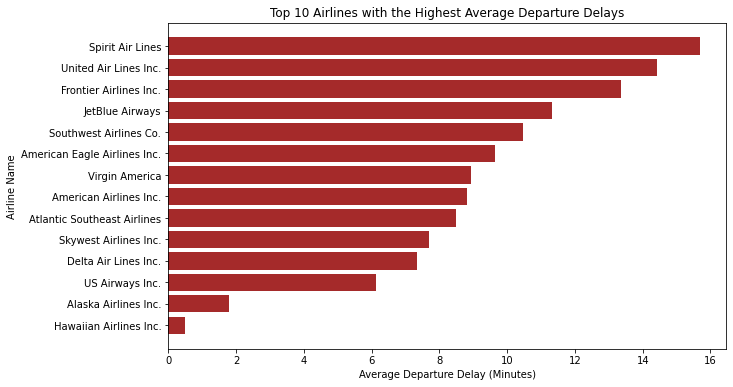

In [0]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to Pandas DataFrame
avg_delay_pd = average_delay_df.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(avg_delay_pd['AIRLINE_NAME'], avg_delay_pd['AVG_DEPARTURE_DELAY'], color='brown')
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Airline Name')
plt.title('Top 10 Airlines with the Highest Average Departure Delays')
plt.gca().invert_yaxis()  # To display the highest delay on top
plt.show()

**Insights :-**

**Spirit Airlines** has the highest average departure delay, followed by **United Air Lines Inc.** and **Frontier Airlines Inc.**, with delays greater than 10 minutes on average. This suggests that these airlines may face consistent issues with timely departures.

**JetBlue Airways** and **Southwest Airlines Co.** also show relatively high average delays, although they are lower than the top three.

**Alaska Airlines Inc.** and **Hawaiian Airlines Inc.** show relatively lower delays compared to the other airlines in the top 10, with average delays closer to 3–4 minutes.

The differences between the airlines suggest that there might be operational or logistical challenges affecting certain carriers more than others.

The top 5 airlines show a significant difference in their average delays compared to the lower half of the top 10, indicating that a few airlines are significantly more prone to delays.

**Q9. What patterns did you observe in delays by day of the week?**

In [0]:
# SQL Query to calculate average delay by day of the week
query = """
SELECT DAY_OF_WEEK, AVG(DEPARTURE_DELAY) AS AVG_DEPARTURE_DELAY
FROM flights_table
WHERE CANCELLED = 0 AND DEPARTURE_DELAY IS NOT NULL
GROUP BY DAY_OF_WEEK
ORDER BY DAY_OF_WEEK
"""

avg_delay_by_day_df = spark.sql(query)

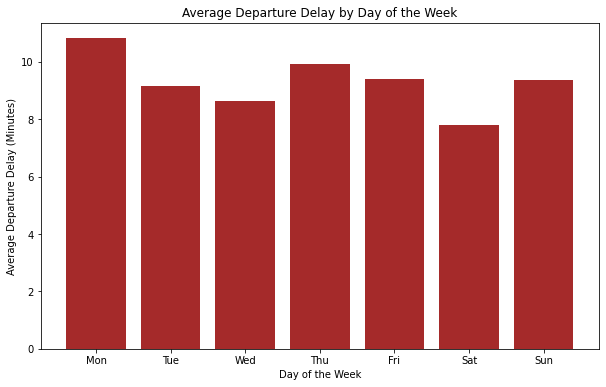

In [0]:
avg_delay_by_day_pd = avg_delay_by_day_df.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(avg_delay_by_day_pd['DAY_OF_WEEK'], avg_delay_by_day_pd['AVG_DEPARTURE_DELAY'], color='brown')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (Minutes)')
plt.title('Average Departure Delay by Day of the Week')
plt.xticks(ticks=range(1, 8), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

**Insights :-**

**Monday** shows the highest average departure delay, with a noticeable peak, suggesting that flights on Mondays tend to experience longer delays than on other days.

The delay times for **Tuesday** through **Friday** are relatively similar, all showing moderate delays, indicating a fairly consistent trend across these days.

Both **Saturday** and **Sunday** show slightly lower average delays compared to weekdays, with Sunday having a delay time almost on par with Friday.

**Thursday** and **Friday** have a similar average delay, which might be indicative of the operational load during the end of the workweek, possibly due to busier travel times.

## Summary

* Airlines with high average delays (Spirit, United, and Frontier) tend to experience more delays on average, which is consistent across both the visualizations and SQL queries.

* The top airports with the most delayed departures are major hub airports like ORD, ATL, and DFW, indicating that larger airports with higher traffic volumes may face more operational challenges and delays.

* Monday sees the highest delays, potentially due to higher demand after the weekend, while weekends tend to show slightly lower delays.

* Flight cancellations are predominantly driven by reasons other than delays, with Other Reasons contributing the largest share of cancellations, while high delays account for only a small portion.